# Introduction

## Configuration de l'environnement

In [7]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuration du style des visualisations
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Chargement et préparation des données

In [8]:
# Charger le jeu de données
df = pd.read_excel("data/database.xlsx")

# Calcul de l'IMC (Indice de Masse Corporelle)
# IMC = Poids (kg) / (Taille (m))^2 ; conversion de la taille de cm à m
df['IMC'] = df['Poids (kg)'] / ((df['Taille (cm)'] / 100) ** 2)

# Création des classes d'âge
bins_age = [0, 18, 35, 50, 65, np.inf]
labels_age = ['0-18', '19-35', '36-50', '51-65', '65+']
df['Classe_age'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age, right=False)

# Création des classes d'IMC selon des seuils standards (OMS)
bins_imc = [0, 18.5, 25, 30, np.inf]
labels_imc = ['Insuffisance pondérale', 'Normale', 'Surpoids', 'Obésité']
df['Classe_IMC'] = pd.cut(df['IMC'], bins=bins_imc, labels=labels_imc)

# Affichage d'un aperçu et des informations
print("Aperçu des 5 premières lignes :")
print(df.head())
print("\nInformations sur les colonnes :")
df.info()
print("\nNombre de valeurs manquantes par colonne :")
print(df.isnull().sum())
print("\nStatistiques descriptives pour les variables numériques :")
print(df.describe())

Aperçu des 5 premières lignes :
    ID Résidence Service_hospitalier Categorie_professionnelle  \
0   92     Ville            Urologie                 Infirmier   
1  121  Banlieue            Urologie                 Infirmier   
2  148  Banlieue         Cardiologie                 Infirmier   
3  161     Ville            Urologie                 Infirmier   
4  192     Ville         Cardiologie                 Infirmier   

  Contact_avec_le_sang Date_de_naissance  Age Sexe Contact_avec_le_patient  \
0                 Rare        1995-01-30   30    M                Fréquent   
1                 Rare        1995-01-30   30    M                Fréquent   
2                 Rare        1995-05-17   30    M                Fréquent   
3                 Rare        1995-01-30   30    M                Fréquent   
4                 Rare        1995-05-17   30    M                Fréquent   

   Annees_pratique_hospitaliere  ... Antecedents_ictere_hepatite Vaccination  \
0                     

## 2. Visualisations des données

### Graphique 1 : Répartition des individus suivant le genre

C:\Users\user\AppData\Local\Temp\ipykernel_9108\141357924.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sexe', palette="Set2")


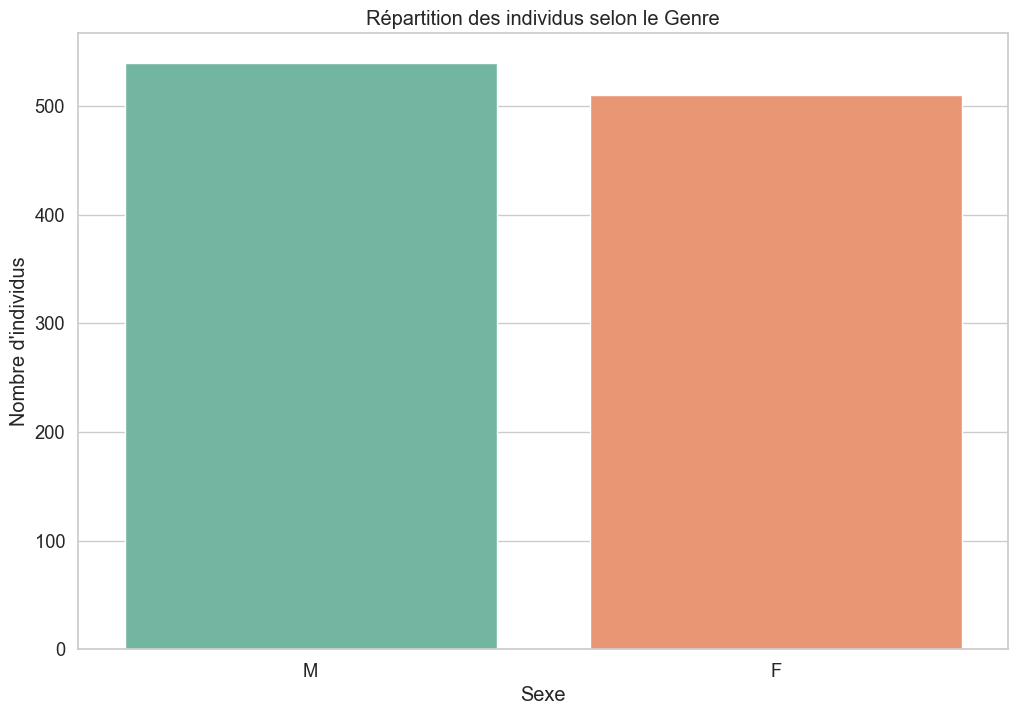

In [9]:
plt.figure()
sns.countplot(data=df, x='Sexe', palette="Set2")
plt.title("Répartition des individus selon le Genre")
plt.xlabel("Sexe")
plt.ylabel("Nombre d'individus")
plt.show()

### Graphique 2 : Répartition des individus suivant les classes d’IMC

C:\Users\user\AppData\Local\Temp\ipykernel_9108\3340828998.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Classe_IMC', palette="Set3", order=labels_imc)


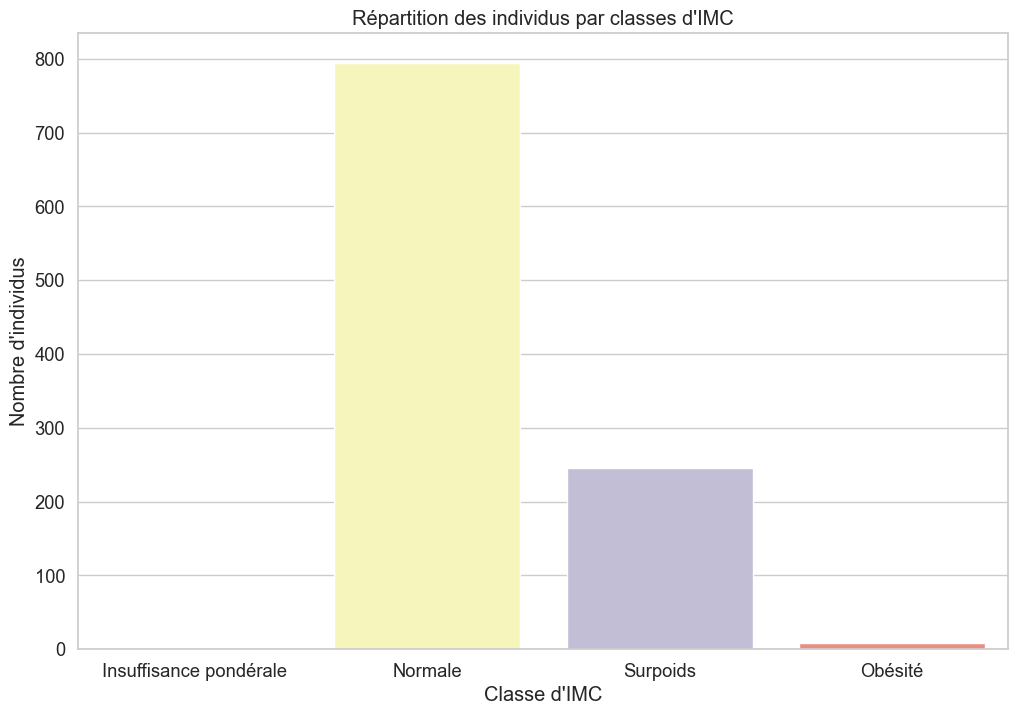

In [10]:
plt.figure()
sns.countplot(data=df, x='Classe_IMC', palette="Set3", order=labels_imc)
plt.title("Répartition des individus par classes d'IMC")
plt.xlabel("Classe d'IMC")
plt.ylabel("Nombre d'individus")
plt.show()

### Graphique 3 : Obésité (proportion d'individus en obésité)

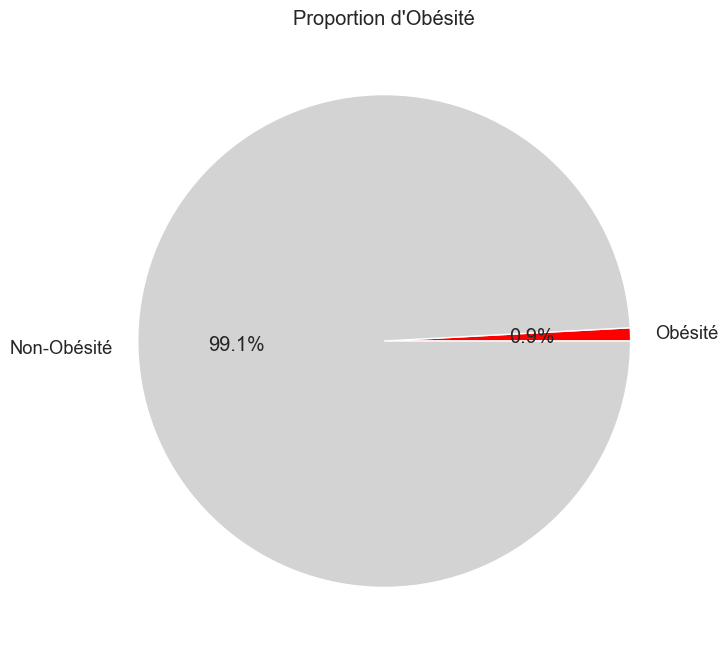

In [11]:
obesite_count = df['Classe_IMC'].value_counts().get('Obésité', 0)
total_count = len(df)
plt.figure()
plt.pie([obesite_count, total_count - obesite_count],
        labels=['Obésité', 'Non-Obésité'], autopct='%1.1f%%',
        colors=["red", "lightgray"])
plt.title("Proportion d'Obésité")
plt.show()

### Graphique 4 : Répartition des individus suivant les classes d’âge

C:\Users\user\AppData\Local\Temp\ipykernel_9108\2839965741.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Classe_age', palette="pastel", order=labels_age)


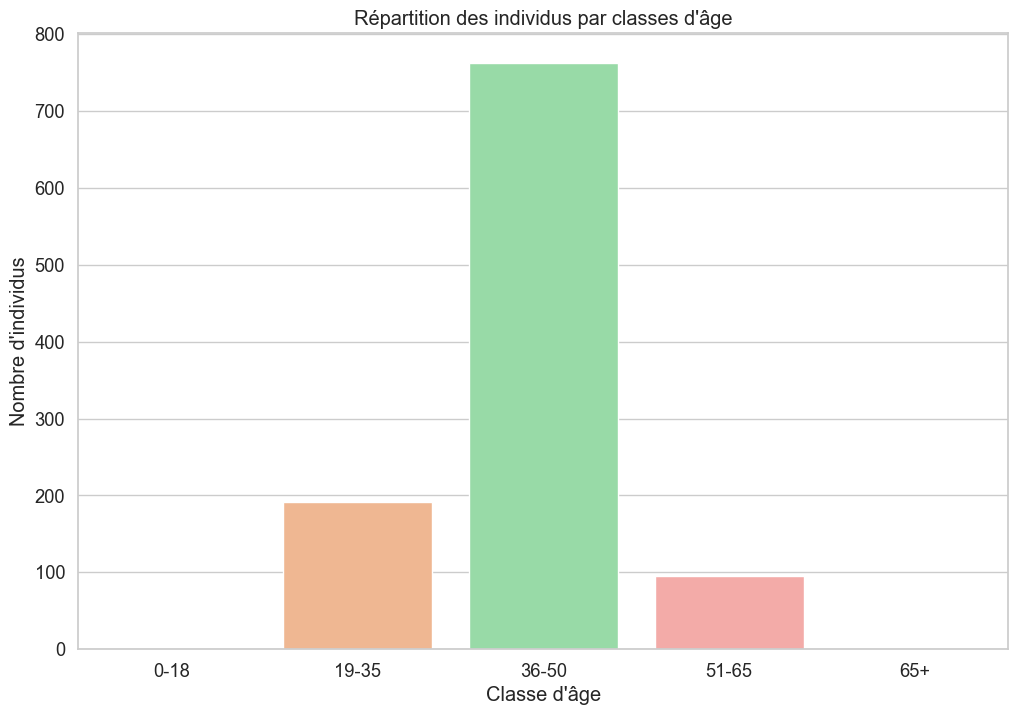

In [12]:
plt.figure()
sns.countplot(data=df, x='Classe_age', palette="pastel", order=labels_age)
plt.title("Répartition des individus par classes d'âge")
plt.xlabel("Classe d'âge")
plt.ylabel("Nombre d'individus")
plt.show()

### Graphique 5 : Répartition des individus suivant leur état matrimonial

C:\Users\user\AppData\Local\Temp\ipykernel_9108\1480910186.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Etat_matrimonial', palette="cool")


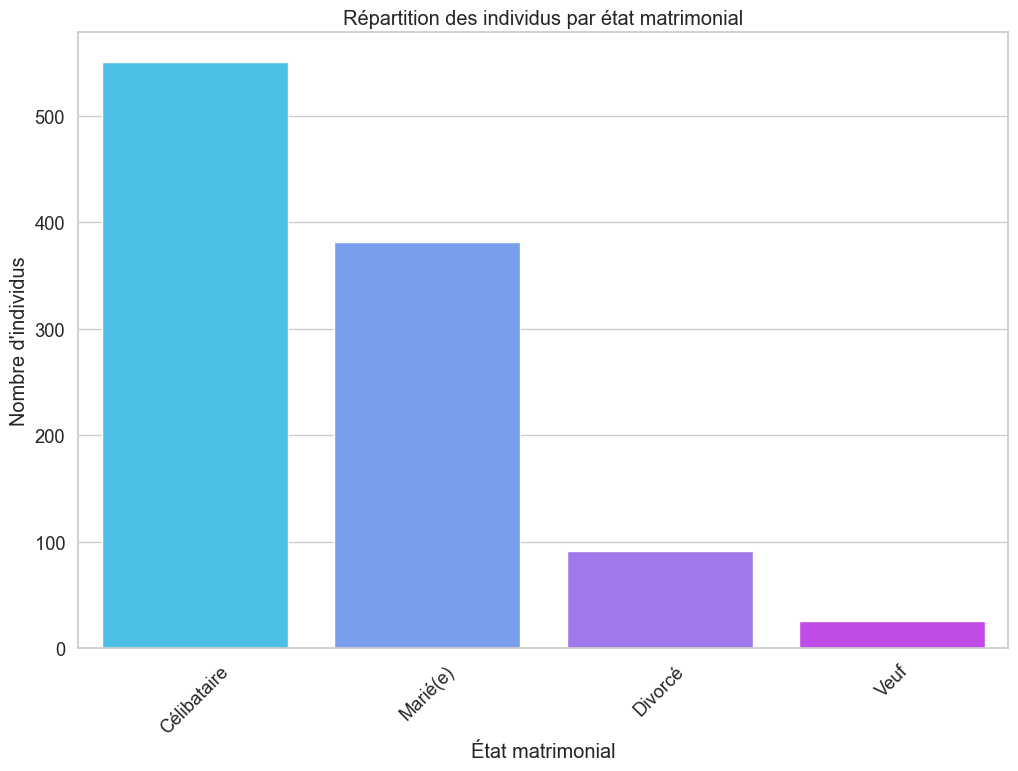

In [13]:
plt.figure()
sns.countplot(data=df, x='Etat_matrimonial', palette="cool")
plt.title("Répartition des individus par état matrimonial")
plt.xlabel("État matrimonial")
plt.ylabel("Nombre d'individus")
plt.xticks(rotation=45)
plt.show()

### Graphique 7 : Fréquence de contact avec le sang des pédiatres mariés non transfusés

C:\Users\user\AppData\Local\Temp\ipykernel_9108\1473979086.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=subset, x='Contact_avec_le_sang', palette="viridis")


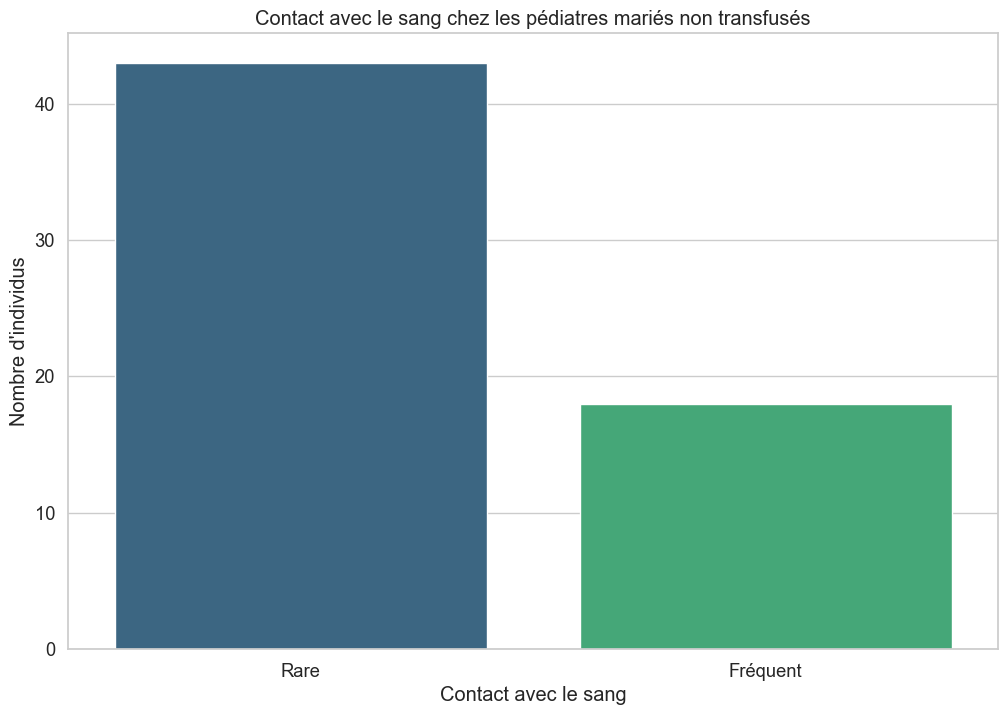

In [14]:
subset = df[
    (df['Categorie_professionnelle'].str.contains("Pédiatre", case=False, na=False)) &
    (df['Etat_matrimonial'].str.contains("Marié", case=False, na=False)) &
    (df['Transfusion_sanguine'].str.contains("Non", case=False, na=False))
]
plt.figure()
sns.countplot(data=subset, x='Contact_avec_le_sang', palette="viridis")
plt.title("Contact avec le sang chez les pédiatres mariés non transfusés")
plt.xlabel("Contact avec le sang")
plt.ylabel("Nombre d'individus")
plt.show()

### Matrice de corrélation pour les variables numériques

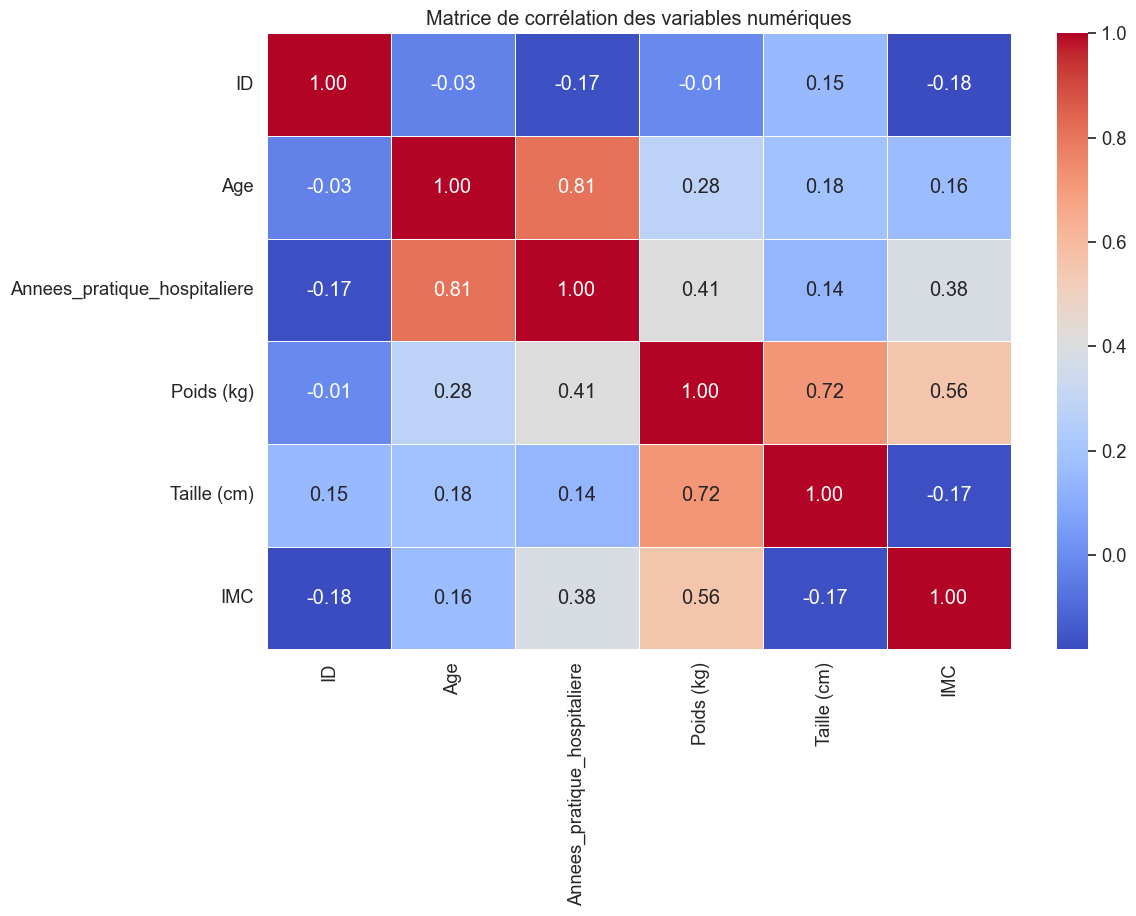

In [15]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numerical_cols].corr()
plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matrice de corrélation des variables numériques")
plt.show()